In [87]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/myopia.csv"
MyopiaData = pd.read_csv(url)

In [89]:
MyopiaData.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


Here is our dataset dictionary: https://www.umass.edu/statdata/statdata/data/myopia.pdf

#### We are interested in finding out what contributes to Myopia the most. My grandmother always told me not to watch TV or play with computer. Her hypothesis was that they will cause Myopia. (She was strangely fine with studying!). It sounds like Drs share the same point of view with my grandmother " http://www.allaboutvision.com/conditions/myopia.htm "

#### We are DataScientist and don't trust our grandmothers or DRs unless we find the same result! Now, let's go and explore Myopia!




In [90]:
# Year of study and id should not affect anything so we disregard them in this study. 
# we consider two types of inputs - first all general inputs - i.e. physical and external inputs
# second only external inputs
X1 = MyopiaData[['SPHEQ','AL','ACD','LT','VCD','AGE','GENDER','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY']]
X2 = MyopiaData[['AGE','GENDER','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY']]
y = MyopiaData['MYOPIC']
X2.head(100)

,AGE,GENDER,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,1,45,8,0,0,10,34,1,1
1,6,1,4,0,1,1,7,12,1,1
2,6,1,14,0,2,0,10,14,0,0
3,6,1,18,11,0,0,4,37,0,1
4,5,0,14,0,0,0,4,4,1,0
5,6,0,10,6,2,1,19,44,0,1
6,6,1,12,7,2,1,8,36,0,1
7,6,1,12,0,0,0,8,8,0,0
8,7,0,4,0,3,1,3,12,0,0
9,6,1,30,5,1,0,10,27,0,0


Run your regression line on X1 and interpret your MOMMY AND DADMY coefficients. Assume variables are significant. Use sklearn 

In [91]:
logreg = LogisticRegression(solver = 'newton-cg', max_iter = 100000)
logreg.fit(X1, y)
print(logreg.coef_)

[[-3.41148484  0.01506592  0.76417269 -0.44270496 -0.28863425 -0.00691402
   0.50381704 -0.04742357  0.09740982  0.0490203  -0.13122631 -0.00426286
  -0.00767174  0.63964881  0.71626829]]


Answer: 

#### Use confusion matrix and estimate False negative rate and False positive rate

In [92]:
y_hat = logreg.predict(X1)
confusion_matrix(y, y_hat)

array([[524,  13],
       [ 53,  28]])

In [93]:
FNR = float(13) / float(13 + 524)
print(FNR)

0.024208566108


In [94]:
FPR = float(53) / float(53 + 28)
print(FPR)

0.654320987654


#### Use 10-fold cross-validation to measure accuracy of your predictions

In [95]:
print(cross_val_score(logreg, X1, y, cv = 10).mean()) 
MisClassificationError = 1 - (cross_val_score(logreg, X1, y, cv = 10).mean())
print(MisClassificationError)

0.883521358482
0.116478641518


#### In your dataset, what percentage of cases are myopic?

In [96]:
MyopiaData['MYOPIC'].describe() # 13.1% of cases are myopic 

count    618.000000
mean       0.131068
std        0.337748
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: MYOPIC, dtype: float64

#### Based on the result you found above, is your prediction precision good or bad?

Answer: good since our misclassification error is 11.3% and our percentage of cases that are myopic are 13.1% 

#### Imagine you would like to decrease your False Positive Rate. Change threshhold and show how FPR, FNR, and total error change by changing Threshhold.

In [97]:
def PredictThreshhold(Predictprob, Threshhold): 
        y_predict = 0
        if (Predictprob >= Threshhold):
            y_predict = 1
        return y_predict
   

In [98]:
y_hat_probability = logreg.predict_proba(X1).T[1]
print(y_hat_probability)

[  5.09615126e-01   2.58173915e-01   6.80264745e-03   2.85487577e-01
   4.01228224e-02   1.52565518e-03   8.65380457e-02   7.04272010e-03
   2.98694265e-03   8.59106601e-03   5.39058656e-02   3.38851198e-01
   2.57512244e-04   1.01253818e-02   1.93659047e-01   5.28170866e-02
   2.50718709e-02   1.66789058e-01   1.84376888e-03   1.06082407e-02
   1.75666232e-01   1.72597641e-01   1.76205351e-01   1.65956869e-02
   2.21967888e-03   4.26534158e-03   1.58935754e-01   7.42884010e-02
   1.49275540e-01   6.81082153e-02   4.05112590e-01   8.14178210e-02
   2.38174059e-02   5.42053390e-03   7.85077447e-02   3.04529877e-02
   3.86724014e-02   7.99349291e-03   2.68127903e-03   5.73786845e-01
   2.00713056e-02   2.74096900e-02   7.03816935e-02   9.81739792e-03
   3.38699739e-03   2.04995090e-01   1.95203280e-02   1.30847082e-02
   1.97489491e-01   1.52870638e-01   3.95979927e-01   4.99752991e-02
   7.59557534e-02   2.07629962e-01   3.92971922e-03   3.28865890e-02
   3.49413769e-02   7.11938926e-02

In [99]:
y_hat_predict_threshhold = []
for j in range(0,len(y_hat_probability)):
    y_hat_predict_threshhold.append(PredictThreshhold(y_hat_probability[j], 0.75))
    
print(y_hat_predict_threshhold)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [100]:
confusion_matrix(y, y_hat_predict_threshhold)

array([[537,   0],
       [ 71,  10]])

In [101]:
FNR = float(0) / float(0 + 537)
print(FNR)

0.0


In [102]:
FPR = float(71) / float(71 + 10)
print(FPR)

0.876543209877


In [103]:
Total_Error = float(0 + 71) / float(0 + 71 + 537 + 10)
print(Total_Error)

0.114886731392


#### Now let's run a logistic regression line on X2 and see if we can confirm our Grandmothers' claims! Use StatsModels api.

In [104]:
import statsmodels.api as sm
MyopiaData['Intercept'] = 1
X2 = MyopiaData[['AGE','GENDER','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY', 'Intercept']]
y = MyopiaData['MYOPIC']

logreg = sm.Logit(y, X2)
result = logreg.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.354054
         Iterations 33


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 MYOPIC   No. Observations:                  618
Model:                          Logit   Df Residuals:                      608
Method:                           MLE   Df Model:                            9
Date:                Wed, 13 Jul 2016   Pseudo R-squ.:                 0.08846
Time:                        13:14:16   Log-Likelihood:                -218.81
converged:                       True   LL-Null:                       -240.04
                                        LLR p-value:                 2.700e-06
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
AGE            0.2744      0.193      1.423      0.155        -0.104     0.652
GENDER         0.4241      0.265      1.599      0.110        -0.096     0.944
SPORTHR       -0.0425      0.018     -2.329      0.020        -0.078    -0.007
READHR         0.0896        nan        nan        nan           nan       nan
COMPHR         0.0295        nan        nan        nan           nan       nan
STUDYHR       -0.1104        nan        nan        nan           nan       nan
TVHR           0.0048        nan        nan        nan           nan       nan
DIOPTERHR      0.0015        nan        nan        nan           nan       nan
MOMMY          0.8701      0.262      3.317      0.001         0.356     1.384
DADMY          1.0250      0.265      3.864      0.000         0.505     1.545
Intercept     -4.7493      1.287     -3.689      0.000        -7.273    -2.226
==============================================================================
"""

#### Interpret your results specifically on StudyHr, TVH, and COMPHR: 

Answer: 

STUDYHR => keeping all other variables constant, for each additional hour you study, your odds of getting myopia decreases by 11.04% 

TVHR => keeping all other variables constant, for each additional hour you watch TV, your odds of geting myopia increases by 0.48% 

COMPHR => keeping all other variables constant, for each additional hour you're on the computer, your odds of getting myopia increases by 2.95%

#### Now it's time for regularization and choosing the best predictors:

In [105]:
def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X-X_Min)/(X_Max - X_Min)
    return X_Standardized


ListOfAllVariables = MyopiaData.columns.values
NameOfVariables = ['AGE','GENDER','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY']

for i in NameOfVariables:
    MyopiaData[i] = Standardize(MyopiaData[i])
    
X2 = MyopiaData[ListOfAllVariables]
del X2['MYOPIC']  
X2.head()

,ID,STUDYYEAR,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,Intercept
0,1,1992,0.25,1.0,-0.052,21.89,3.690,3.498,14.70,1.000000,0.40,0.000000,0.000000,0.322581,0.323232,1.0,1.0,1
1,2,1995,0.25,1.0,0.608,22.38,3.702,3.392,15.29,0.088889,0.00,0.033333,0.066667,0.225806,0.101010,1.0,1.0,1
2,3,1991,0.25,1.0,1.179,22.49,3.462,3.514,15.52,0.311111,0.00,0.066667,0.000000,0.322581,0.121212,0.0,0.0,1
3,4,1990,0.25,1.0,0.525,22.20,3.862,3.612,14.73,0.400000,0.55,0.000000,0.000000,0.129032,0.353535,0.0,1.0,1
4,5,1995,0.00,0.0,0.697,23.29,3.676,3.454,16.16,0.311111,0.00,0.000000,0.000000,0.129032,0.020202,1.0,0.0,1


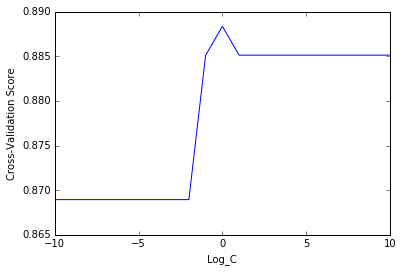

In [106]:
c_list = np.logspace(-10,10,21) 
c_index = np.linspace(-10,10,21)

cv_scores = []
for c_score in c_list:
    logreg = LogisticRegression(C = c_score, penalty = "l1")
    cv_scores.append(cross_val_score(logreg, X2, y, cv = 10, scoring = 'accuracy').mean())

plt.plot(c_index, cv_scores)
plt.xlabel("Log_C")
plt.ylabel("Cross-Validation Score")
plt.show()

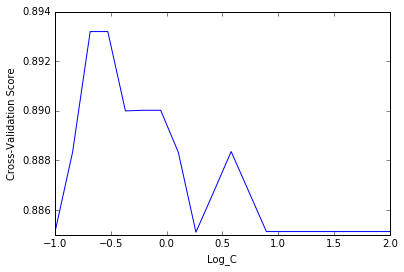

Our optimal C is 0.206914
Our accuracy at optimal C is 0.893199


In [107]:
c_list = np.logspace(-1,2,20) 
c_index = np.linspace(-1,2,20)

cv_scores = []
for c_score in c_list:
    logreg = LogisticRegression(C = c_score, penalty = "l1")
    cv_scores.append(cross_val_score(logreg, X2, y, cv = 10, scoring = 'accuracy').mean())

plt.plot(c_index, cv_scores)
plt.xlabel("Log_C")
plt.ylabel("Cross-Validation Score")
plt.show()

print("Our optimal C is %f" %c_list[np.argmax(cv_scores)])   
print("Our accuracy at optimal C is %f" %np.max(cv_scores))

In [108]:
logreg = LogisticRegression(C = 1.832981, penalty = "l1")
logreg.fit(X2,y)
logreg.coef_

array([[  1.99009336e-04,   8.12023845e-04,   0.00000000e+00,
          4.92946180e-01,  -3.82022902e+00,  -9.61122003e-02,
          1.02517972e+00,  -1.21265007e-01,  -2.16746793e-01,
         -1.85834766e+00,   8.00689154e-01,   0.00000000e+00,
         -1.50356565e+00,   0.00000000e+00,   0.00000000e+00,
          6.49881354e-01,   7.67094115e-01,   0.00000000e+00]])

In [109]:
Var_coef = zip(logreg.coef_[0,:], NameOfVariables)
sorted(Var_coef)

[(-3.8202290161829313, 'COMPHR'),
 (-1.8583476634978269, 'DADMY'),
 (-0.21674679320978391, 'MOMMY'),
 (-0.12126500706026033, 'DIOPTERHR'),
 (-0.096112200277537696, 'STUDYHR'),
 (0.0, 'SPORTHR'),
 (0.00019900933596347302, 'AGE'),
 (0.00081202384500121899, 'GENDER'),
 (0.49294618028184173, 'READHR'),
 (1.0251797213221896, 'TVHR')]

#### What is your conclusions about your Grandmothers' and some other Drs' claims?

Answer: Computer, TV, and Dad having Myopia are the worst. 

Grandma was right! 

#### Draw ROC curve for your best tuned model. 

In [110]:
y_hat_probability = logreg.predict_proba(X2).T[1]
ThreshholdRange =  np.linspace(0, 1, 100)

In [112]:
def Not_Confusion_Matrix(confmat, ErrType):
    TP = confmat[0,0] #True Positive
    FP = confmat[1,0] #False Positive
    FN = confmat[0,1] #False Negative
    TN = confmat[1,1] #True Negative
    if ErrType == 'Err':
        return float(FP + FN)/(FP + FN + TP + TN)
    elif ErrType == 'Acc':
        return float(TP + TN)/(FP + FN + TP + TN)
    elif ErrType == 'FPR':
        return float(FP)/(FP + TN)
    elif ErrType == 'TNR':
        return float(TN)/(FP + TN)
    elif ErrType == 'TPR':
        return float(TP)/(FN + TP)
    elif ErrType == 'FNR':
        return float(FN)/(FN + TP)
    else:
        print("You must input 'Err', 'Acc', 'FPR', 'TNR', 'TPR', or 'FNR' as your input")
        return "NaN"

In [113]:
FPR_List = []
FNR_List = []
TPR_List = []
Err_List = []

for i in ThreshholdRange:
    y_hat_predict_threshhold = []
    for j in range(0,len(y_hat_probability)):
            y_hat_predict_threshhold.append(PredictThreshhold(y_hat_probability[j],i))
            
    confmat = confusion_matrix(y, y_hat_predict_threshhold)
    FPR_List.append(Not_Confusion_Matrix(confmat, 'FPR'))
    FNR_List.append(Not_Confusion_Matrix(confmat, 'FNR'))
    Err_List.append(Not_Confusion_Matrix(confmat, 'Err'))
    TPR_List.append(Not_Confusion_Matrix(confmat, 'TPR'))


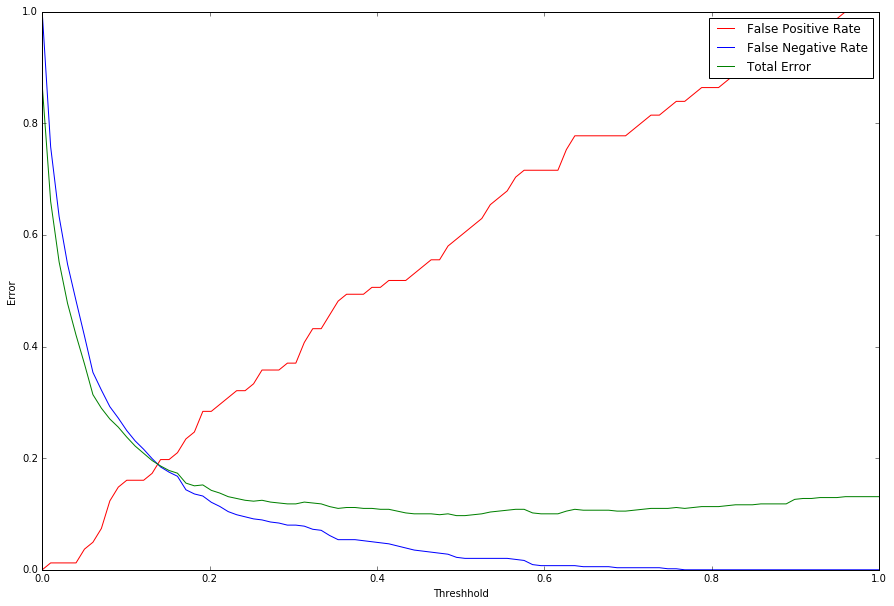

In [114]:
plt.figure(figsize=(15,10))

plt.plot(ThreshholdRange, FPR_List, color = 'r', label = 'False Positive Rate')
plt.plot(ThreshholdRange, FNR_List, color = 'b', label = 'False Negative Rate')
plt.plot(ThreshholdRange, Err_List, color = 'g', label = 'Total Error')
plt.xlabel("Threshhold")
plt.ylabel("Error")
plt.legend()
plt.show()

In [117]:

vals = roc_curve(y, y_hat_probability)

plt.plot(vals[0], vals[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

NameError: name 'roc_curve' is not defined